In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('GOOGL.csv', date_parser = True)

data.tail()

C:\Users\DARSHAN B\AppData\Local\Temp\ipykernel_9724\321720682.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('GOOGL.csv', date_parser = True)


,Date,Open,High,Low,Close,Adj Close,Volume
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700
4430,2022-03-24,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1317900


In [4]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [7]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

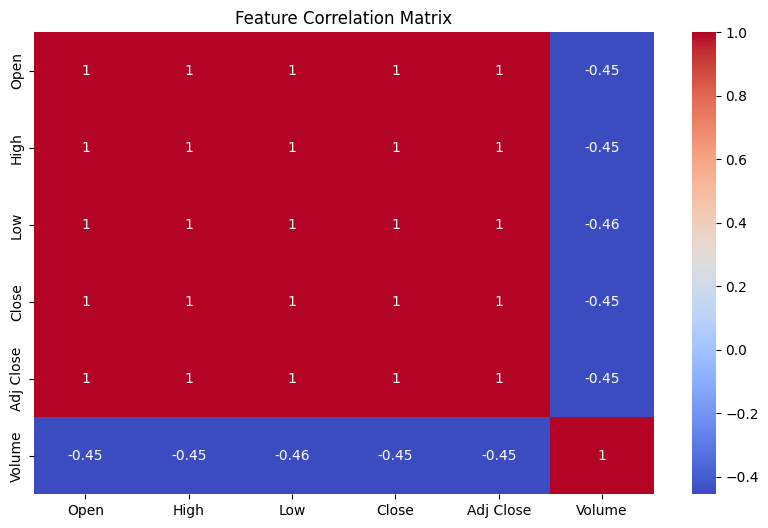

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns like 'Date'
numeric_data = data.drop(columns=['Date'])

# Plot correlation matrix
plt.figure(figsize=(10,6))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


From the heatmap above, we observe that the 'Close' price is highly correlated with 'Open', 'High', and 'Low', indicating it's a good representative of the stock's daily trend. As it reflects the final value at the end of trading, it is most commonly used in financial forecasting, making it an appropriate target (output) column for prediction.

In [9]:
data_training = data[data['Date']<'2019-01-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()

In [10]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [11]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[3.27076291e-04, 9.36027567e-04, 0.00000000e+00, 1.33688677e-04,
        5.40710393e-01],
       [7.34916593e-04, 2.96140240e-03, 1.87022750e-03, 3.36247683e-03,
        2.73350337e-01],
       [4.66793067e-03, 4.73662871e-03, 5.39234743e-03, 3.80405377e-03,
        2.17265746e-01],
       ...,
       [7.87877956e-01, 8.08064229e-01, 7.89295551e-01, 8.11727769e-01,
        2.17957570e-02],
       [8.14744202e-01, 8.16842824e-01, 8.18102800e-01, 8.06693170e-01,
        1.46918004e-02],
       [8.13396822e-01, 8.15843250e-01, 8.10728176e-01, 8.05300884e-01,
        1.39028803e-02]])

In [12]:
# create RNN with 60 timesteps, i.e. look 60 previous time steps
X_train = []
y_train = []
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

In [13]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
X_train.shape

(3557, 60, 5)

In [16]:
# building LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [17]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

C:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 60)              │          15,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 120)                 │          86,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 102,841 (401.72 KB)

 Trainable params: 102,841 (401.72 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [20]:
regressor.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0222
Epoch 2/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0017
Epoch 3/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0015
Epoch 4/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0018
Epoch 5/5
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0012


In [21]:
#test data preparation
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1027.199951,1060.790039,1025.280029,1054.680054,1054.680054,1593400
3618,2019-01-03,1050.670044,1066.260010,1022.369995,1025.469971,1025.469971,2098000
3619,2019-01-04,1042.560059,1080.000000,1036.859985,1078.069946,1078.069946,2301100
3620,2019-01-07,1080.969971,1082.699951,1062.640015,1075.920044,1075.920044,2372300
3621,2019-01-08,1086.000000,1093.349976,1068.349976,1085.369995,1085.369995,1770700


In [22]:
data_training= data_test.tail()

In [23]:
past_60_days = data_training.tail(60)
df = pd.concat([past_60_days, data_test], ignore_index=True)
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,2668.489990,2724.879883,2645.169922,2722.510010,2223100
1,2723.270020,2741.000000,2681.850098,2722.030029,1341600
2,2722.030029,2821.000000,2722.030029,2797.360107,1774800
3,2774.050049,2791.770020,2756.699951,2765.510010,1257700
4,2784.000000,2832.379883,2755.010010,2831.439941,1317900


In [24]:
inputs = scaler.transform(df)
inputs

array([[2.11286602, 2.1555163 , 2.13761466, 2.1631518 , 0.02085616],
       [2.15706216, 2.16851095, 2.1678048 , 2.16276329, 0.01005751],
       [2.15606174, 2.23300009, 2.20087546, 2.22373734, 0.01536434],
       ...,
       [2.15606174, 2.23300009, 2.20087546, 2.22373734, 0.01536434],
       [2.19803113, 2.20943738, 2.22941104, 2.19795707, 0.00902971],
       [2.20605868, 2.24217357, 2.22802011, 2.2513224 , 0.00976717]])

In [25]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [26]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((759, 60, 5), (759,))

In [27]:
y_pred = regressor.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [28]:
y_test

array([0.95137457, 0.92774367, 0.93228582, 0.92157976, 0.90833219,
       0.91210802, 0.91804601, 0.92813899, 0.93834485, 0.93720734,
       0.94366976, 0.93706207, 0.92962347, 0.93220516, 0.93527909,
       0.94070072, 0.94753423, 0.9523024 , 0.95794995, 0.9644043 ,
       0.95768375, 0.97379538, 0.9850501 , 0.9848162 , 0.98730109,
       0.99305352, 0.92053897, 0.92608163, 0.90599247, 0.90987319,
       0.90550841, 0.91665027, 0.90977638, 0.89792454, 0.90295892,
       0.88391862, 0.88156275, 0.86561254, 0.9053793 , 0.90859839,
       0.89017934, 0.89137338, 0.88876746, 0.88458823, 0.88937255,
       0.88088507, 0.87380141, 0.86367621, 0.85196964, 0.82073872,
       0.80263423, 0.81111363, 0.80402189, 0.81053277, 0.82886308,
       0.84499086, 0.83124308, 0.83508342, 0.83914161, 0.83862525,
       0.85669744, 0.85326049, 0.86492669, 0.85537428, 0.86355518,
       0.85958572, 0.84015818, 0.83672931, 0.82904863, 0.84825841,
       0.85131609, 0.86234499, 0.86304689, 0.86829105, 0.85574

In [29]:
scaler.scale_

array([8.06792972e-04, 8.06114202e-04, 8.23064254e-04, 8.09424979e-04,
       1.22503130e-08])

In [30]:
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [31]:
y_pred = y_pred*scale
y_test = y_test*scale

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Inverse transform to get actual price values
predicted_prices = y_pred
actual_prices = y_test.reshape(-1, 1)

# Performance metrics
mae = mean_absolute_error(actual_prices, predicted_prices)
mse = mean_squared_error(actual_prices, predicted_prices)
rmse = math.sqrt(mse)
r2 = r2_score(actual_prices, predicted_prices)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 56.7420
Mean Squared Error (MSE): 6243.9813
Root Mean Squared Error (RMSE): 79.0189
R² Score: 0.9839


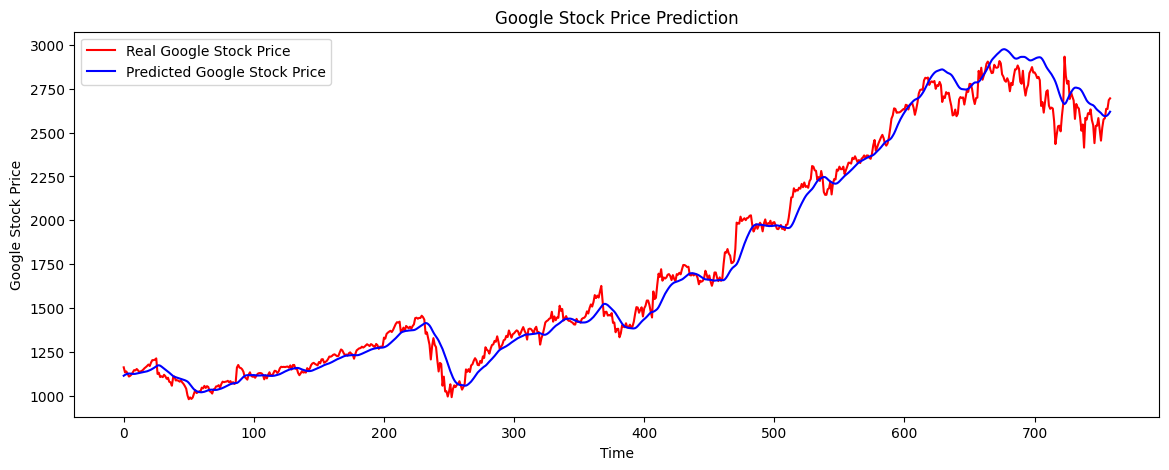

In [33]:
# Visualising the results
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()